In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from datetime import date

import warnings
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv("/Users/allisonkelly/Documents/Notebooks/user_behavior_analysis/data/interim/paid.csv", 
                 header=0, 
                 index_col=0).reset_index(drop=True)

In [4]:
df.head()

,team_id,account_start_date,trial_end_date,mocks_count,entities_count,intents_count,variables_count,last_login,sub_end,stripe_plan,members,reviewers,testers,is_enterprise,churned
0,1,2017-01-10 15:45:21,NaN,73,7,41,27,2020-12-05 23:24:18,NaN,pro-plan,7,0,8,0,0
1,57,2017-01-11 12:48:38,NaN,1,0,0,0,2020-08-26 00:13:38,2017-02-15 07:07:30,solo-plan,0,0,0,0,1
2,82,2017-01-14 22:08:41,NaN,6,0,0,0,NaN,NaN,starter-plan,2,0,0,0,0
3,101,2017-01-22 09:14:29,NaN,1,0,0,0,NaN,2017-03-19 06:54:32,starter-plan,4,0,0,0,1
4,151,2017-02-11 01:29:34,2017-02-26 01:29:38,1,0,0,0,NaN,2017-02-26 01:29:38,starter-plan,2,0,0,0,1


In [5]:
df.groupby('churned').count()['team_id']

churned
0    217
1    930
Name: team_id, dtype: int64

In [62]:
features = df.drop(['team_id','account_start_date','trial_end_date','last_login','sub_end','stripe_plan'],axis=1)

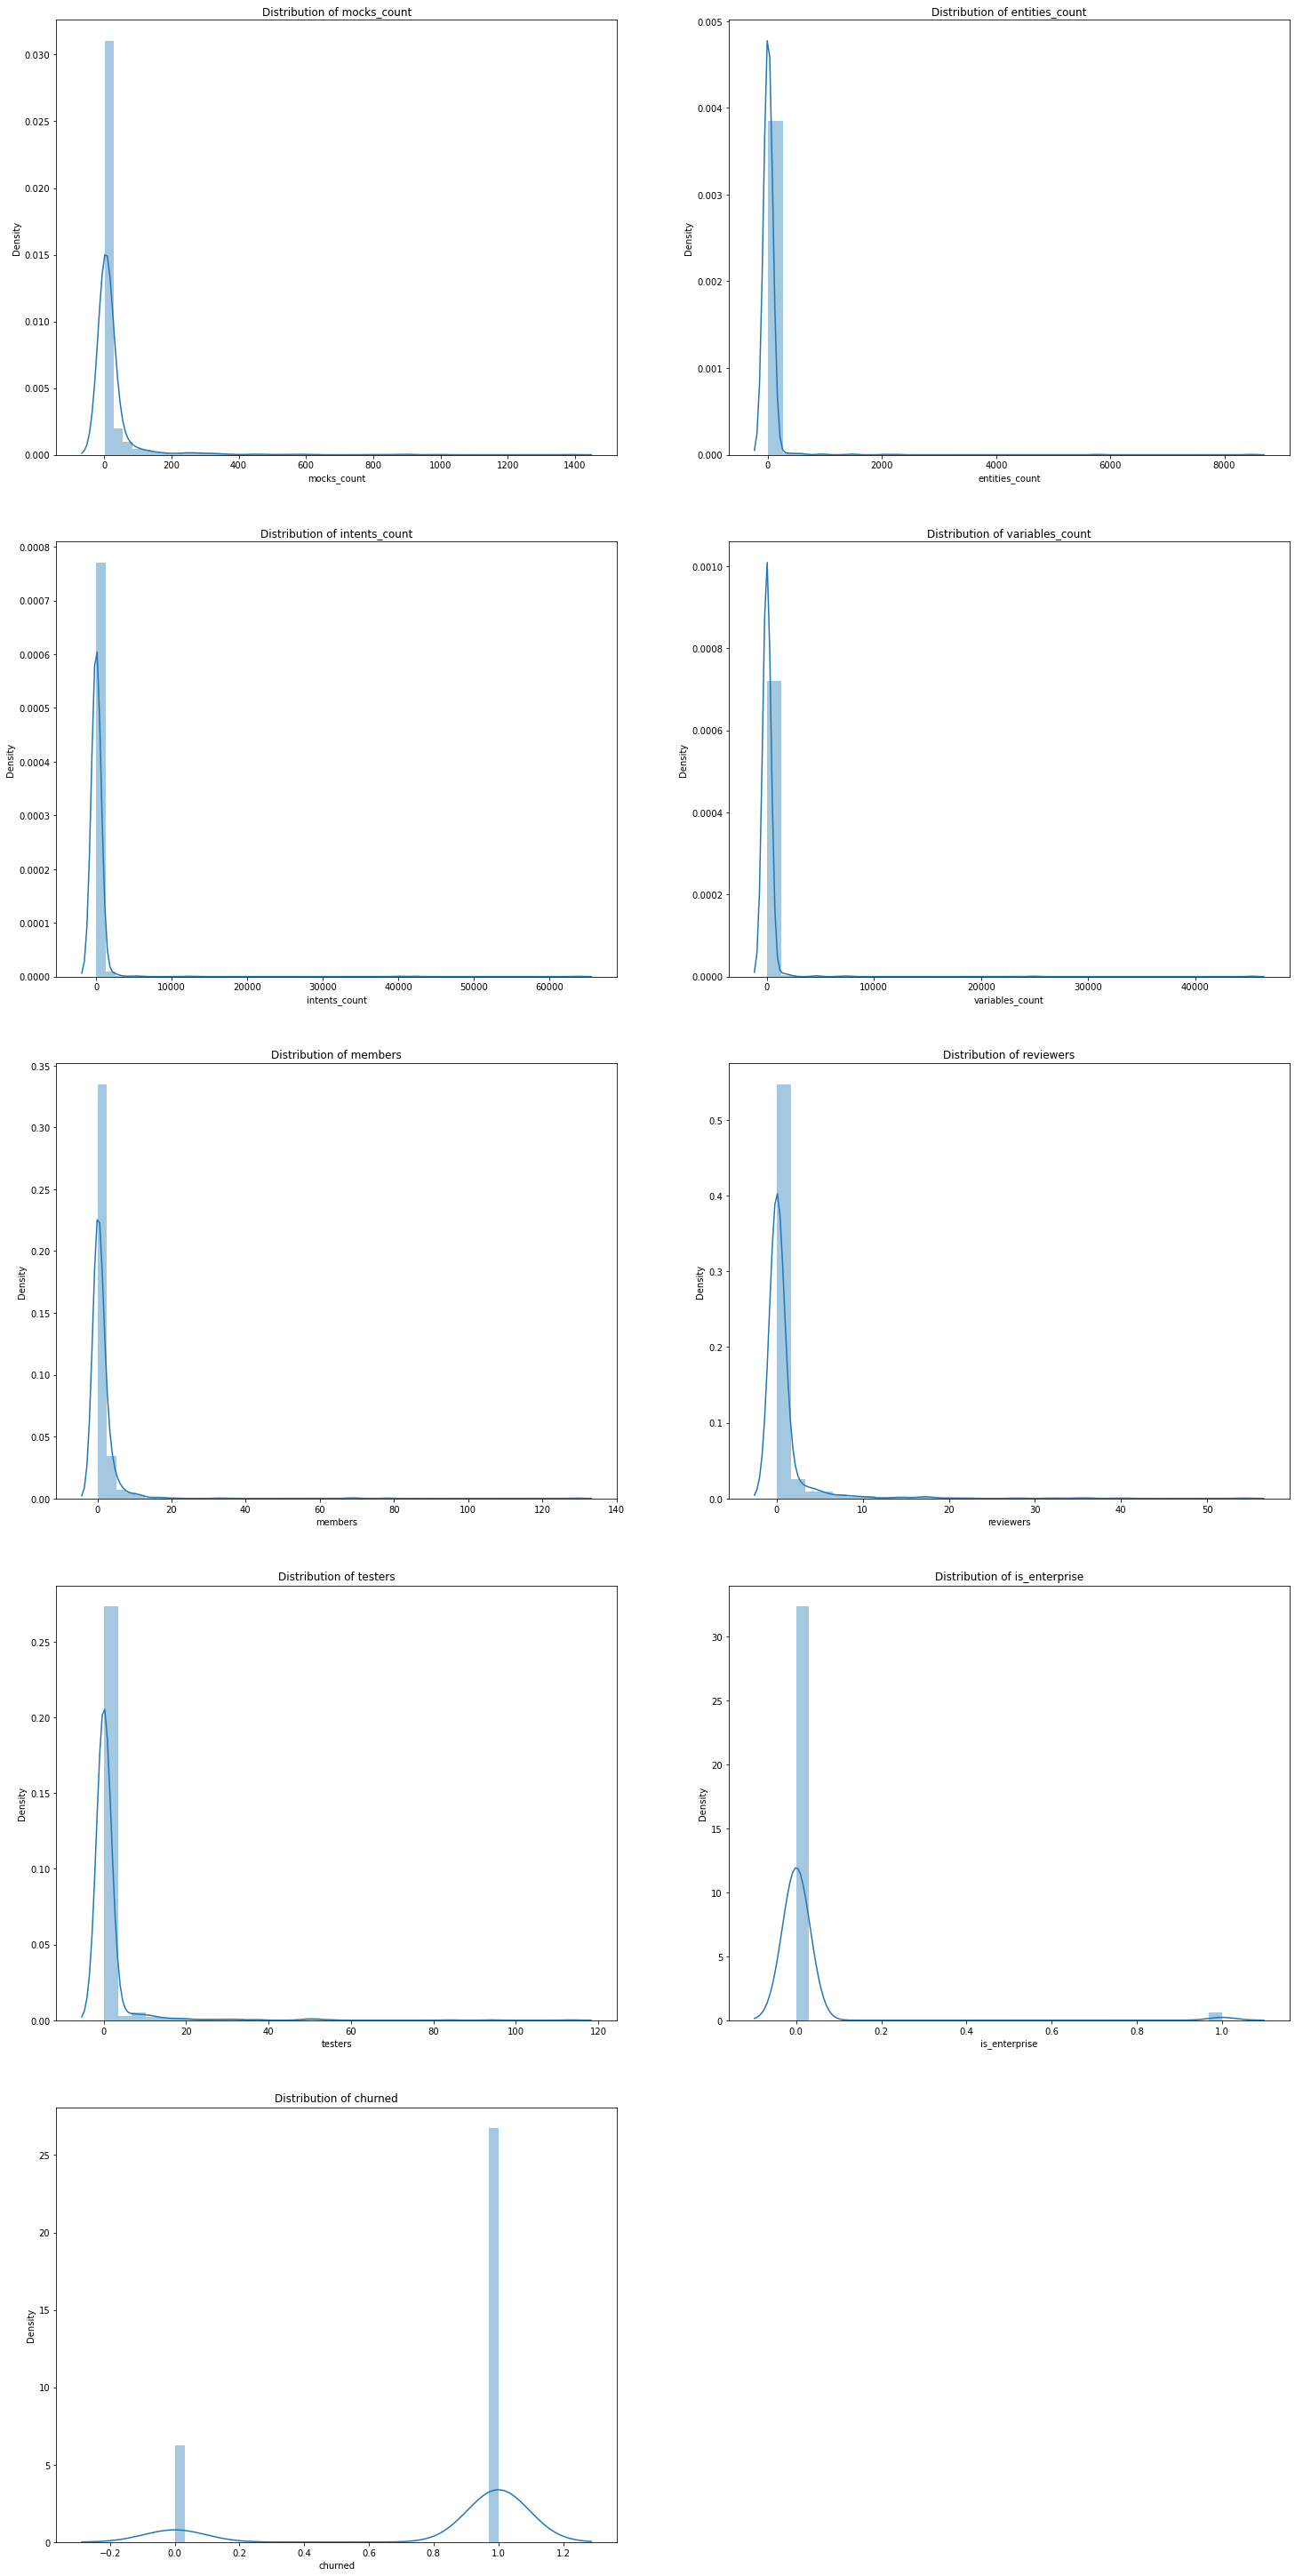

In [65]:
# Plotting normalized distribution plots of features we're going to test
%matplotlib inline
fig = plt.subplots(figsize=(20, 40))
plt.tight_layout()

for plot, col in zip(range(1,11), features.columns):
    
    plt.subplot(5,2,plot)
    sns.distplot(features[col],norm_hist=True)
    plt.title(f"Distribution of {col}")

In [8]:
# Groupby retained and messages then get into the right format
df2 = df.groupby(['churned', 'mocks_count']
                        ).count()['team_id'].unstack().reset_index(drop=True).rename_axis(None, axis=1)
df2 = df2.T
df2.fillna(0, inplace=True)
df2

,0,1
1,19.0,267.0
2,11.0,151.0
3,12.0,101.0
4,7.0,69.0
5,6.0,55.0
...,...,...
788,1.0,0.0
864,1.0,0.0
901,2.0,0.0
992,1.0,0.0
